In [3]:
# Importamos las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [4]:
# Leemos las bases de datos train y test.
test_df = pd.read_csv("/content/test.csv")
train_df = pd.read_csv("/content/train.csv")
# Mostramos las 5 primeras filas de la base de datos train.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Mostramos la cantidad de filas y columnas que tienen las bases de datos test y train respectivamente.
print("La cantidad de datos para la variable test son ", test_df.shape)
print("La cantidad de datos para la variable entrenamiento son ", train_df.shape)

La cantidad de datos para la variable test son  (418, 11)
La cantidad de datos para la variable entrenamiento son  (891, 12)


In [6]:
# Revisamos si, para la base de entrenamiento, las variables contienen valores nulos y su tipo de dato.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


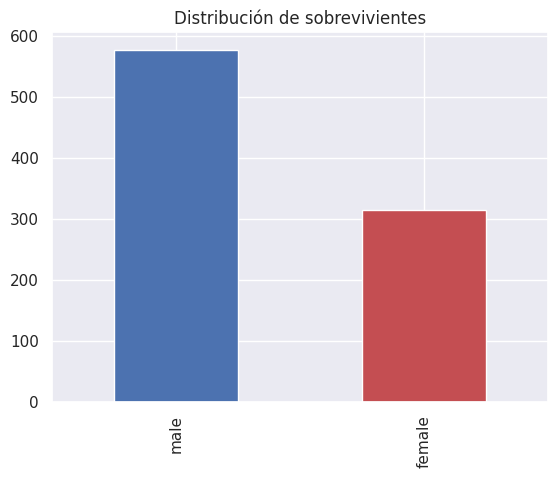

In [7]:
# Revisión de distribución de sobrevivientes que contiene la base de datos, con la finalidad de ver qué tan balanceada puede estar nuestra base de datos en
# relación con sí sobrevivieron más hombres que mujeres o viceversa.
train_df.Sex.value_counts().plot(kind = "bar", color = ["b", "r"])
plt.title("Distribución de sobrevivientes")
plt.show()

Tenemos un conjunto de datos desbalanceados.

In [8]:
# podemos preprocesar nuestro data set más adelante.
from sklearn import preprocessing
# codificamos etiquetas de una característica categórica en valores numéricos entre 0 y 1.
label_encoder = preprocessing.LabelEncoder()

#  permitirá modificar la variable sex para poder trabajar con esta información de una manera categórica.
encoder_sex = label_encoder.fit_transform(train_df["Sex"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# a) Debemos describir brevemente la cantidad de valores faltantes para cada una de las variables de la base de datos.

# revisamos si nuestro data set contiene datos nulos.
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# revisamos si nuestro data set contiene datos nulos.
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# b) Completemos aquellas variables que se encuentran faltantes para las bases de train (“Age”, ”fare”, “Cabin”) y test ( “Age”, “Cabin”,“embarked”).

# Primero trabajamos con la base de datos train.
# Calculamos el promedio de la columna "Age".
train_df1 = train_df.dropna()
mean = train_df1["Age"].mean()
mean

35.6744262295082

In [12]:
# Completamos los valores faltantes de la columna "Age" con el promedio.
train_df["Age"] = train_df["Age"].fillna(mean)

In [13]:
# Mostramos que no hay valores nulos para la columna "Age".
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Tomamos la estrategia de poner Unknown a los valores nulos de "Cabin" debido a que tiene una gran cantidad de faltantes.
train_df['Cabin'].fillna('Unknown', inplace=True)

In [15]:
# Mostramos que no hay valores nulos para la columna "Cabin".
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

Para la base de datos train, la columna "Fare" no tiene valores nulos

In [16]:
# Ahora debemos imputar la columna "Embarked"
train_df['Embarked'].fillna('Unknown', inplace=True)

In [17]:
# Mostramos que no hay valores nulos.
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
# Ahora trabajamos con la base de datos test
# Calculamos el promedio de la columna "Age".
test_df1 = test_df.dropna()
mean = test_df1["Age"].mean()
mean

39.247126436781606

In [19]:
# Completamos los valores faltantes de la columna "Age" con el promedio.
test_df["Age"] = test_df["Age"].fillna(mean)

In [20]:
# Mostramos que no hay valores nulos para la columna "Age".
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
# Tomamos la estrategia de poner Unknown a los valores nulos de "Cabin" debido a que tiene una gran cantidad de faltantes.
test_df['Cabin'].fillna('Unknown', inplace=True)

In [22]:
# Mostramos que no hay valores nulos para la columna "Cabin".
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [23]:
# Ahora imputamos sobre la columna "Fare"
# Calculamos el promedio de la columna "Fare".
test_df2 = test_df.dropna()
mean = test_df2["Fare"].mean()
mean

35.627188489208635

In [24]:
# Completamos los valores faltantes de la columna "Fare" con el promedio.
test_df["Fare"] = test_df["Fare"].fillna(mean)

In [25]:
# Mostramos que no hay valores nulos.
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Para la base de datos test, la columna "Embarked" no tiene valores nulos.

In [26]:
# c) Ahora, debemos ajustar nuestro primer modelo de árbol de decisión.

# Para ello, eliminaremos las variables PassengerId, Survived, Name, Ticket y Cabin.
train_predictors = train_df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis = 1)
categorical_cols = [cname for cname in train_predictors.columns if
                    train_predictors[cname].nunique() <10 and
                    train_predictors[cname].dtype == "object"
]
numerical_cols = [cname for cname in train_predictors.columns if
                    train_predictors[cname].dtype in ["int64", "float64"]
                    ]

In [37]:
# Revisamos cada una de las variables.
train_predictors

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.000000,1,0,7.2500
1,female,C,1,38.000000,1,0,71.2833
2,female,S,3,26.000000,0,0,7.9250
3,female,S,1,35.000000,1,0,53.1000
4,male,S,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,male,S,2,27.000000,0,0,13.0000
887,female,S,1,19.000000,0,0,30.0000
888,female,S,3,35.674426,1,2,23.4500
889,male,C,1,26.000000,0,0,30.0000


In [28]:
# realizaremos el mismo proceso, pero ahora para las columnas de carácter numérico, que, en este caso, son: PClass, Age, SibSp, Parch, Fare.
numerical_cols = [cname for cname in train_predictors.columns if train_predictors[cname].dtype in ["int64", "float64"]]
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [29]:
# Consolidación de las variables categóricas y numéricas.
my_cols = categorical_cols + numerical_cols
train_predictors = train_predictors[my_cols]
train_predictors

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.000000,1,0,7.2500
1,female,C,1,38.000000,1,0,71.2833
2,female,S,3,26.000000,0,0,7.9250
3,female,S,1,35.000000,1,0,53.1000
4,male,S,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,male,S,2,27.000000,0,0,13.0000
887,female,S,1,19.000000,0,0,30.0000
888,female,S,3,35.674426,1,2,23.4500
889,male,C,1,26.000000,0,0,30.0000


In [30]:
# Variable dummy.
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)
dummy_encoded_train_predictors

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
0,3,22.000000,1,0,7.2500,0,1,0,0,1,0
1,1,38.000000,1,0,71.2833,1,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1,0
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0
4,3,35.000000,0,0,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1,0
887,1,19.000000,0,0,30.0000,1,0,0,0,1,0
888,3,35.674426,1,2,23.4500,1,0,0,0,1,0
889,1,26.000000,0,0,30.0000,0,1,1,0,0,0


In [31]:
# d) Finalmente, podemos entrenar y determinar Accuracy, F1-Score, Recall.

y_target = train_df["Survived"].values
x_features_one = dummy_encoded_train_predictors.values

In [32]:
# A cada uno de estos datos los vamos a dividir en entrenamiento y validación con el método: train_test_split.
x_train, x_test, y_train, y_test = train_test_split(x_features_one, y_target, test_size=0.25, random_state=1)
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)
tree_one_accuracy = round(tree_one.score(x_test, y_test), 4)
tree_one_accuracy

0.7399

In [33]:
# Visualización de un árbol de decisión.
# Importación de pydotplus.
from io import StringIO
from IPython.display import Image, display
import pydotplus




In [34]:
# código para generar árbol de decisión.
out = StringIO()
tree.export_graphviz(tree_one, out_file = out)
graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png("titanic.png")

True

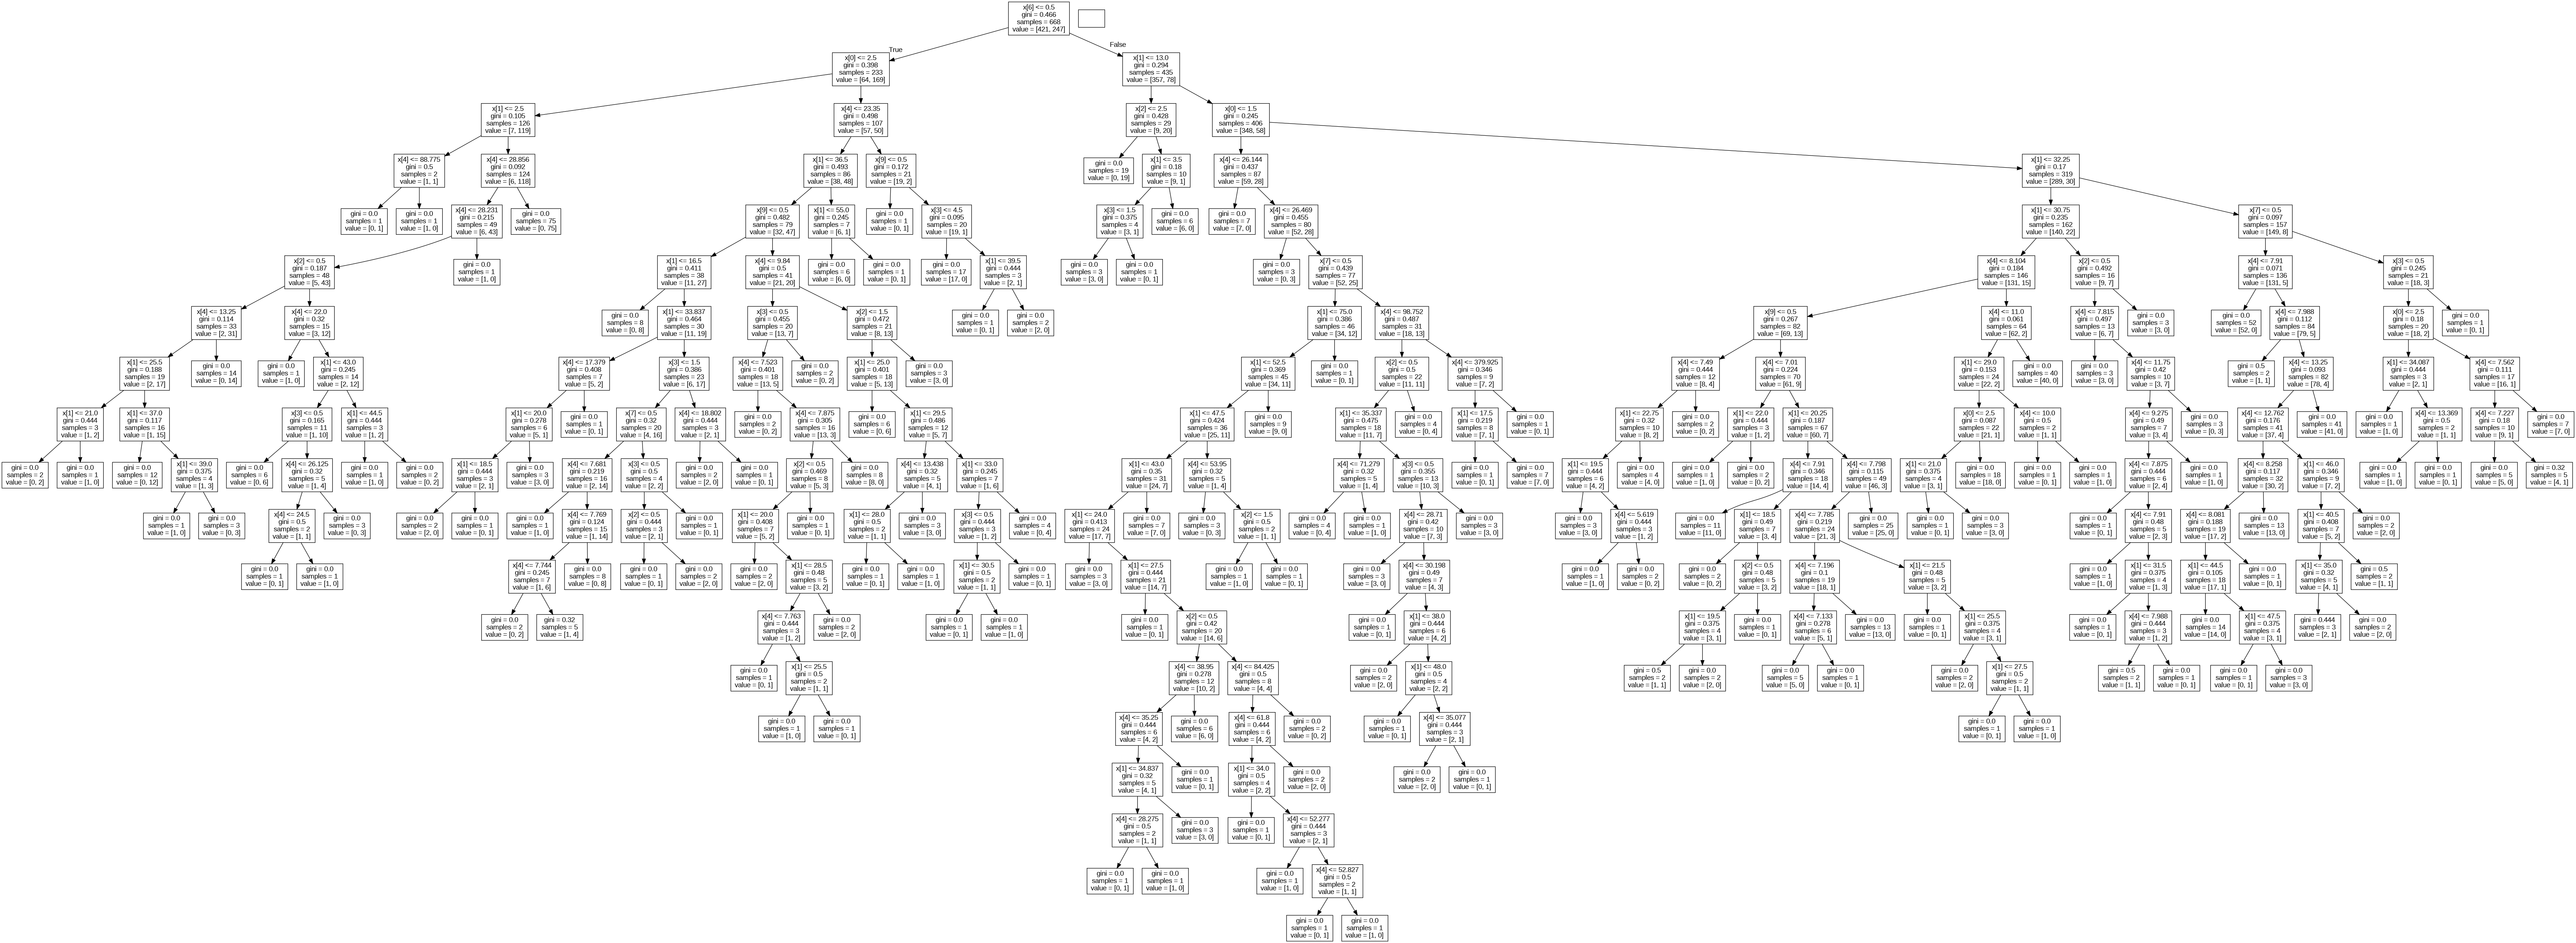

In [35]:
# Mostramos el árbol de decisión.
Image(graph.create_png())

In [36]:
# Calculamos accuracy, F1-Score y Recall.
# Importamos la función accuracy_score.
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Hacemos predicciones en los datos de prueba.
y_pred = tree_one.predict(x_test)

# Calculamos Accuracy.
accuracy = accuracy_score(y_test, y_pred)

# Calculamos F1-Score.
f1 = f1_score(y_test, y_pred)

# Calculamos Recall (tasa de verdaderos positivos).
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Recall:", recall)

Accuracy: 0.7399103139013453
F1-Score: 0.6847826086956521
Recall: 0.6631578947368421


**En conclución:**

Exactitud (**Accuracy**): La exactitud indica la proporción de pasajeros que fueron correctamente clasificados (sobrevivieron o no) en relación con el total de pasajeros en el conjunto de datos de prueba. Una exactitud del 73.99% significa que el modelo clasificó correctamente el destino de aproximadamente el 73.99% de los pasajeros en el conjunto de prueba.

Puntuación F1 (**F1-Score**): La puntuación F1 es una medida del equilibrio entre la precisión y el recall. Un F1-score del 68.48% indica que el modelo tiene un buen equilibrio entre la precisión (proporción de verdaderos positivos entre las predicciones positivas) y el recall (proporción de verdaderos positivos entre todas las instancias positivas reales).

**Recall** (Sensibilidad): El recall del 66.32% significa que el modelo identificó correctamente alrededor del 66.32% de los pasajeros que realmente sobrevivieron en el conjunto de prueba. En otras palabras, el modelo pudo capturar alrededor del 66.32% de todos los casos de supervivencia.